<h1 style="color:tomato;text-align:center;font-size:300%;font-family:verdana;"> Customer Segmentation Excercise</h1>

We are an online company and we have dataset containing online sales.<br>
We want to segment our customers to groups to give them targeted commercials.<br> 

Your job is to find the best customer segmentation.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

### Import the data and print the head
you might need to use encoding='unicode_escape'

In [2]:
data = pd.read_csv('Data/OnlineRetail.csv', encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


### Check the shape of the data

In [3]:
data.shape

(541909, 8)

---
# Exploratory Data Analysis

### Check the info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Generate descriptive statistics

In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### How much of the data per feature is null values, percentage-wise
Expected Answer:<br>
InvoiceNo       0.000000<br>
StockCode       0.000000<br>
Description     0.268311<br>
Quantity        0.000000<br>
InvoiceDate     0.000000<br>
UnitPrice       0.000000<br>
CustomerID     24.926694<br>
Country         0.000000

In [6]:
null_percentage = data.isnull().mean() * 100
null_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

___
# Feature Engineering

### Drop the null values

In [7]:
data.dropna(inplace=True)

### Check again the shape of the data

In [8]:
data.shape

(406829, 8)

### Change the customer id feature to a string type

In [9]:
data['CustomerID'] = data['CustomerID'].astype(str)
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

### Change the invoice date to a datetime type
use format='%d-%m-%Y %H:%M'

In [10]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M')
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

### Create a feature of the total amount spent
quantity * unit price

In [11]:
data['TotalAmountSpent'] = data['Quantity'] * data['UnitPrice']

### Check the head of the data

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Sum the total amount spent per customer id to a new data frame and print the head
the new data frame should contain only customer id and total amount spent

In [13]:
data_total_amount_spent = data.groupby('CustomerID')['TotalAmountSpent'].sum().reset_index()
data_total_amount_spent = data_total_amount_spent[['CustomerID', 'TotalAmountSpent']]
data_total_amount_spent.head()

,CustomerID,TotalAmountSpent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### Count the invoice numbers per customer id to a new data frame and print the head

In [14]:
data_invoice_counts = data.groupby('CustomerID')['InvoiceNo'].size().reset_index()
data_invoice_counts.columns = ['CustomerID', 'InvoiceNo']
data_invoice_counts.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


###  Find how many days passed between each customer's transaction and the last transaction of the company - make a new data frame containing each customer's transaction (min) and print the head

In [15]:
data_with_days = data.copy()
data_with_days['DaysSinceLastTransaction'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days
data_with_days = data_with_days.groupby('CustomerID')['DaysSinceLastTransaction'].min().reset_index()
data_with_days.head()

,CustomerID,DaysSinceLastTransaction
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [16]:
data_last_invoice_date = data.copy()
data_last_invoice_date = data_last_invoice_date.groupby('CustomerID')['InvoiceDate'].max().reset_index()
data_last_invoice_date.head()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [17]:
merged_df_days_date_last_transaction = pd.merge(data_with_days, data_last_invoice_date, on='CustomerID')
merged_df_days_date_last_transaction.head()

,CustomerID,DaysSinceLastTransaction,InvoiceDate
0,12346.0,325,2011-01-18 10:17:00
1,12347.0,1,2011-12-07 15:52:00
2,12348.0,74,2011-09-25 13:13:00
3,12349.0,18,2011-11-21 09:51:00
4,12350.0,309,2011-02-02 16:01:00


### Merge the total amount spent data frame and the invoice number data frame


In [18]:
merged_df_TotalAmount_InvoiceNumber = pd.merge(data_total_amount_spent, data_invoice_counts, on='CustomerID')
merged_df_TotalAmount_InvoiceNumber.head()

,CustomerID,TotalAmountSpent,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### Merge the above data frame and the last transaction data frame


In [19]:
merged_df_TotalAmount_InvoiceNumber_LastTransaction = pd.merge(merged_df_TotalAmount_InvoiceNumber, data_with_days, on='CustomerID')
merged_df_TotalAmount_InvoiceNumber_LastTransaction.head()

,CustomerID,TotalAmountSpent,InvoiceNo,DaysSinceLastTransaction
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [20]:
merged_df_TotalAmount_InvoiceNumber_LastTransaction = pd.merge(merged_df_TotalAmount_InvoiceNumber, merged_df_days_date_last_transaction, on='CustomerID')
merged_df_TotalAmount_InvoiceNumber_LastTransaction.head()

,CustomerID,TotalAmountSpent,InvoiceNo,DaysSinceLastTransaction,InvoiceDate
0,12346.0,0.00,2,325,2011-01-18 10:17:00
1,12347.0,4310.00,182,1,2011-12-07 15:52:00
2,12348.0,1797.24,31,74,2011-09-25 13:13:00
3,12349.0,1757.55,73,18,2011-11-21 09:51:00
4,12350.0,334.40,17,309,2011-02-02 16:01:00


### Change the last transaction column to show only the days
use datetime's days method

In [21]:
merged_df_TotalAmount_InvoiceNumber_LastTransaction['InvoiceDate'] = merged_df_TotalAmount_InvoiceNumber_LastTransaction['InvoiceDate'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))
merged_df_TotalAmount_InvoiceNumber_LastTransaction.head()

,CustomerID,TotalAmountSpent,InvoiceNo,DaysSinceLastTransaction,InvoiceDate
0,12346.0,0.00,2,325,2011-01-18
1,12347.0,4310.00,182,1,2011-12-07
2,12348.0,1797.24,31,74,2011-09-25
3,12349.0,1757.55,73,18,2011-11-21
4,12350.0,334.40,17,309,2011-02-02


### Make sure the features names are: CustomerID, Total_Amount_Spent, Last_invoice, Last_transaction

In [22]:
new_column_names = {
    'CustomerID': 'CustomerID',
    'TotalAmountSpent': 'Total_Amount_Spent',
    'DaysSinceLastTransaction': 'Last_invoice',
    'InvoiceDate': 'Last_transaction'
}
merged_df_TotalAmount_InvoiceNumber_LastTransaction = merged_df_TotalAmount_InvoiceNumber_LastTransaction.drop(columns=['InvoiceNo'])
merged_df_TotalAmount_InvoiceNumber_LastTransaction = merged_df_TotalAmount_InvoiceNumber_LastTransaction.rename(columns=new_column_names)
merged_df_TotalAmount_InvoiceNumber_LastTransaction.head()

,CustomerID,Total_Amount_Spent,Last_invoice,Last_transaction
0,12346.0,0.00,325,2011-01-18
1,12347.0,4310.00,1,2011-12-07
2,12348.0,1797.24,74,2011-09-25
3,12349.0,1757.55,18,2011-11-21
4,12350.0,334.40,309,2011-02-02


### Check the shape of the new data frame
<u><b>from now on any mention of data frame refers to the new data frame</b></u>

In [23]:
df = merged_df_TotalAmount_InvoiceNumber_LastTransaction
df.shape

(4372, 4)

### Drop the customer id column

In [24]:
df = df.drop('CustomerID', axis=1)
df.head()

,Total_Amount_Spent,Last_invoice,Last_transaction
0,0.00,325,2011-01-18
1,4310.00,1,2011-12-07
2,1797.24,74,2011-09-25
3,1757.55,18,2011-11-21
4,334.40,309,2011-02-02


___
# Segmentation

### Create a new data frame containing the indices 1, 4302, 2438, 261 and display the data frame

In [25]:
indices = [1, 4302, 2438, 261]
TotalAmount_InvoiceNumber_LastTransaction = pd.DataFrame(df.loc[indices],columns=df.keys()).reset_index(drop=True)
display(TotalAmount_InvoiceNumber_LastTransaction)

,Total_Amount_Spent,Last_invoice,Last_transaction
0,4310.00,1,2011-12-07
1,212.96,150,2011-07-12
2,12433.34,3,2011-12-05
3,3817.08,0,2011-12-09


### Display a heatmap of the indices data frame percentiles
print the annotations

,Total_Amount_Spent,Last_invoice,Last_transaction
1,92.7,3.5,95.4
4302,17.6,76.1,24.0
2438,98.5,8.3,90.6
261,91.3,1.2,99.6


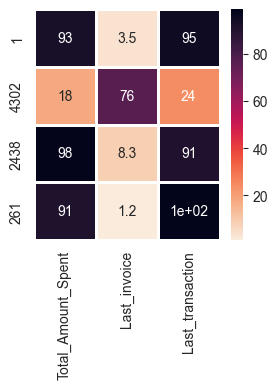

In [26]:
import seaborn as sns
percentiles=df.rank(pct=True)
percentiles=(percentiles*100).apply(lambda x:np.round(x,decimals=1))
percentiles.head()
percentiles=percentiles.iloc[indices]
plt.figure(figsize=(3,3))
sns.heatmap(percentiles,vmin=1,vmax=99,annot=True,cmap='rocket_r',
           linecolor='white',linewidths=1)
display(percentiles)

### Import train_test_split, DecisionTreeRegressor, r2_score if you haven't done this already

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

### What are the data frames keys?

In [28]:
# column names are keys on DataFrame
keys = merged_df_TotalAmount_InvoiceNumber_LastTransaction.keys()
keys

Index(['CustomerID', 'Total_Amount_Spent', 'Last_invoice', 'Last_transaction'], dtype='object')

### Check the r^2 score using decision tree regressor for each feature with the other features
make each feature a traget and split to training set and test set and check the r2 score

In [29]:
df['Last_transaction_ordinal'] = pd.to_datetime(df['Last_transaction']).apply(lambda x: x.toordinal())

for feature in ['Total_Amount_Spent', 'Last_invoice', 'Last_transaction_ordinal']:
    # Set the target variable for the current iteration
    target = df[feature]
    
    # Set the input variables (all other numeric columns except the target)
    inputs = df.select_dtypes(include=[np.number]).drop(columns=[feature])
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)
    
    # Create a decision tree regressor model
    model = DecisionTreeRegressor()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)
    
    # Print the R-squared score for the current feature
    print(f"R-squared score for {feature}: {r2}")

R-squared score for Total_Amount_Spent: 0.02045651474869259
R-squared score for Last_invoice: 0.9999451313864122
R-squared score for Last_transaction_ordinal: 0.9999517886537883


#### Are there any perfect predictors?

Last_transaction

### Print a boxplot to check for outliers

   Total_Amount_Spent  Last_invoice Last_transaction   
0                0.00           325       2011-01-18  \
1             4310.00             1       2011-12-07   
2             1797.24            74       2011-09-25   
3             1757.55            18       2011-11-21   
4              334.40           309       2011-02-02   

   Last_transaction_ordinal  Last_transaction_ts  
0                    734155             12953088  
1                    734478             13232160  
2                    734405             13169088  
3                    734462             13218336  
4                    734170             12966048  


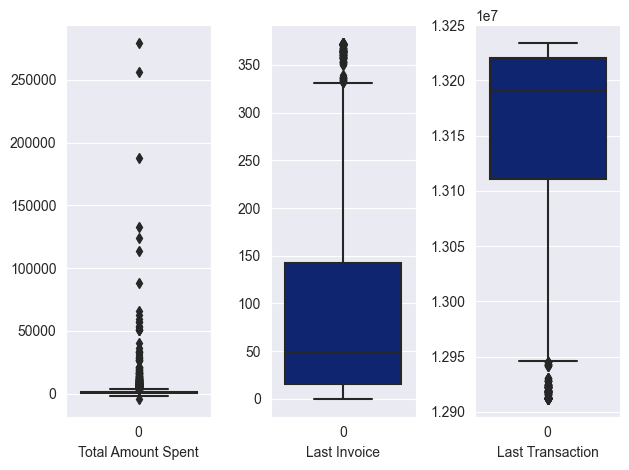

In [30]:
df['Last_transaction'] = pd.to_datetime(df['Last_transaction'])
df['Last_transaction_ts'] = df.Last_transaction.values.astype(np.int64) // 10 ** 11
print(df.head())

fig, axes = plt.subplots(1, 3)
sns.boxplot(data=df['Total_Amount_Spent'], ax=axes[0], palette='dark')
axes[0].set(xlabel='Total Amount Spent')
sns.boxplot(data=df['Last_invoice'], ax=axes[1], palette='dark')
axes[1].set(xlabel='Last Invoice')
sns.boxplot(data=df['Last_transaction_ts'], ax=axes[2], palette='dark')
axes[2].set(xlabel='Last Transaction')
fig.tight_layout()
plt.show()

### Use Tukey's rule for finding outliers for each feature

In [31]:
#   Tukey's Rule: Tukey's rule says that the outliers are values more than 1.5 times the interquartile range from the quartiles — either below Q1 − 1.5IQR, or above Q3 + 1.5IQR.

qs_total_amount_spent = np.quantile(df['Total_Amount_Spent'], [0, .25, .50, .75, 1])
qs_last_invoice = np.quantile(df['Last_invoice'], [0, .25, .50, .75, 1])
qs_last_transaction = np.quantile(df['Last_transaction'], [0, .25, .50, .75, 1])

iqr_total_amount_spent = qs_total_amount_spent[3] - qs_total_amount_spent[1]
iqr_last_invoice = qs_last_invoice[3] - qs_last_invoice[1]
iqr_last_transaction = qs_last_transaction[3] - qs_last_transaction[1]

outlier_total_amount_spent = []
for amount in df['Total_Amount_Spent']:
    if amount < qs_total_amount_spent[1] - (1.5 * iqr_total_amount_spent) or amount > qs_total_amount_spent[3] + (1.5 * iqr_total_amount_spent):
        outlier_total_amount_spent.append(True)
    else:
        outlier_total_amount_spent.append(False)

outlier_last_invoice = []
for invoice in df['Last_invoice']:
    if invoice < qs_last_invoice[1] - (1.5 * iqr_last_invoice) or invoice > qs_last_invoice[3] + (1.5 * iqr_last_invoice):
        outlier_last_invoice.append(True)
    else:
        outlier_last_invoice.append(False)

outlier_last_transaction = []
for transaction in df['Last_transaction']:
    if transaction < qs_last_transaction[1] - (1.5 * iqr_last_transaction) or transaction > qs_last_transaction[3] + (1.5 * iqr_last_transaction):
        outlier_last_transaction.append(True)
    else:
        outlier_last_transaction.append(False)

df_tukey = df.copy()
df_tukey['Outlier_Total_Amount_Spent'] = outlier_total_amount_spent
df_tukey['Outlier_Last_Invoice'] = outlier_last_invoice
df_tukey['Outlier_Last_Transaction'] = outlier_last_transaction
df_tukey.head()

,Total_Amount_Spent,Last_invoice,Last_transaction,Last_transaction_ordinal,Last_transaction_ts,Outlier_Total_Amount_Spent,Outlier_Last_Invoice,Outlier_Last_Transaction
0,0.00,325,2011-01-18,734155,12953088,False,False,False
1,4310.00,1,2011-12-07,734478,13232160,True,False,False
2,1797.24,74,2011-09-25,734405,13169088,False,False,False
3,1757.55,18,2011-11-21,734462,13218336,False,False,False
4,334.40,309,2011-02-02,734170,12966048,False,False,False


### Print the outliers that are repeating on more the one feature

In [32]:
df_tukey[
    ((df_tukey['Outlier_Total_Amount_Spent'] == True) & (df_tukey['Outlier_Last_Invoice'] == True)) |
    ((df_tukey['Outlier_Total_Amount_Spent'] == True) & (df_tukey['Outlier_Last_Transaction'] == True)) |
    ((df_tukey['Outlier_Last_Invoice'] == True) & (df_tukey['Outlier_Last_Transaction'] == True))
    ]

,Total_Amount_Spent,Last_invoice,Last_transaction,Last_transaction_ordinal,Last_transaction_ts,Outlier_Total_Amount_Spent,Outlier_Last_Invoice,Outlier_Last_Transaction
33,401.90,337,2011-01-06,734143,12942720,False,True,True
77,173.55,366,2010-12-08,734114,12917664,False,True,True
114,334.93,335,2011-01-07,734144,12943584,False,True,True
125,-1126.00,337,2011-01-06,734143,12942720,False,True,True
136,383.70,352,2010-12-21,734127,12928896,False,True,True
...,...,...,...,...,...,...,...,...
4246,181.12,367,2010-12-07,734113,12916800,False,True,True
4261,-35.40,360,2010-12-14,734120,12922848,False,True,True
4288,448.65,353,2010-12-21,734127,12928896,False,True,True
4350,-50.10,354,2010-12-20,734126,12928032,False,True,True


### How many outliers are there?

In [33]:
len(df_tukey[
    ((df_tukey['Outlier_Total_Amount_Spent'] == True) & (df_tukey['Outlier_Last_Invoice'] == True)) |
    ((df_tukey['Outlier_Total_Amount_Spent'] == True) & (df_tukey['Outlier_Last_Transaction'] == True)) |
    ((df_tukey['Outlier_Last_Invoice'] == True) & (df_tukey['Outlier_Last_Transaction'] == True))
    ])

143

### Create a new data frame (final) without the outliers that are repeating more than once

In [35]:
repeating_outliers_df = df_tukey[
    ((df_tukey['Outlier_Total_Amount_Spent'] == True) & (df_tukey['Outlier_Last_Invoice'] == True)) |
    ((df_tukey['Outlier_Total_Amount_Spent'] == True) & (df_tukey['Outlier_Last_Transaction'] == True)) |
    ((df_tukey['Outlier_Last_Invoice'] == True) & (df_tukey['Outlier_Last_Transaction'] == True))
    ].reset_index()

repeating_outliers_df['index']
df_final = df.drop(repeating_outliers_df['index'])
df_final.head()

,Total_Amount_Spent,Last_invoice,Last_transaction,Last_transaction_ordinal,Last_transaction_ts
0,0.00,325,2011-01-18,734155,12953088
1,4310.00,1,2011-12-07,734478,13232160
2,1797.24,74,2011-09-25,734405,13169088
3,1757.55,18,2011-11-21,734462,13218336
4,334.40,309,2011-02-02,734170,12966048


### Check the shape of the final data frame

In [36]:
df_final.shape

(4229, 5)

___
# Clustering

### Use the Elbow Method to choose the number of clusters

In [37]:
from scipy.spatial.distance import cdist 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from tqdm import tqdm

def calc_elbow(X, no_clusters):
    distortions = [] 
    inertias = [] 
    
    for k in tqdm(range(1, no_clusters + 1)): 
        #Building and fitting the model 
        clus_kmean = KMeans(n_clusters=k).fit(X) 
        clus_kmean.fit(X)     
        distortions.append(sum(np.min(cdist(X, clus_kmean.cluster_centers_, 
                          'euclidean'),axis=1)) / X.shape[0]) 
        inertias.append(clus_kmean.inertia_)
        
    return distortions, inertias

final_df_array = np.asarray(df)

dist, inert = calc_elbow(df_final[['Total_Amount_Spent', 'Last_invoice', 'Last_transaction_ts']], 20)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.88it/s]


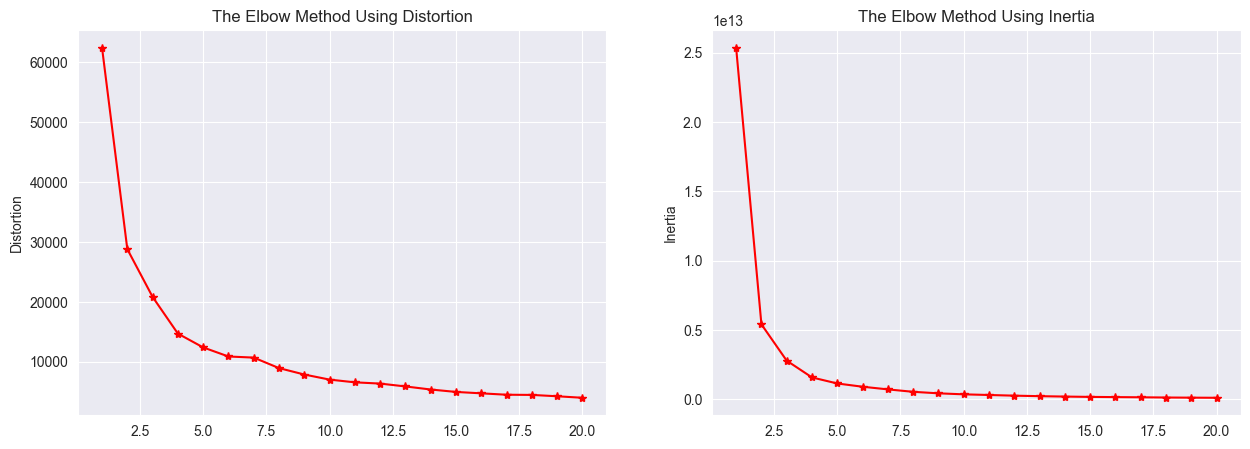

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(range(1, 21), dist, 'r*-')
axes[1].plot(range(1, 21), inert, 'r*-')
axes[0].set_ylabel('Distortion')
axes[1].set_ylabel('Inertia')
axes[0].set_title('The Elbow Method Using Distortion')
axes[1].set_title('The Elbow Method Using Inertia')

plt.show()

### How many clusters does the elbow method suggest is best?

4

### Use Dendrogram to choose the number of clusters

In [39]:
import scipy
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster

In [40]:
# This cell will take approximately 5 minutes
df_final_mtx = df_final[['Total_Amount_Spent', 'Last_invoice', 'Last_transaction_ts']].values
len_df = df_final_mtx.shape[0]
D = scipy.zeros([len_df, len_df])

for i in tqdm(range(len_df)):
    for j in range(len_df):
        D[i, j] = scipy.spatial.distance.euclidean(df_final_mtx[i], df_final_mtx[j])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4229/4229 [02:52<00:00, 24.54it/s]


In [41]:
# This cell will take approximately 1 minute
Z = hierarchy.linkage(D, 'average')
clusters = fcluster(Z, 4, criterion ='distance')

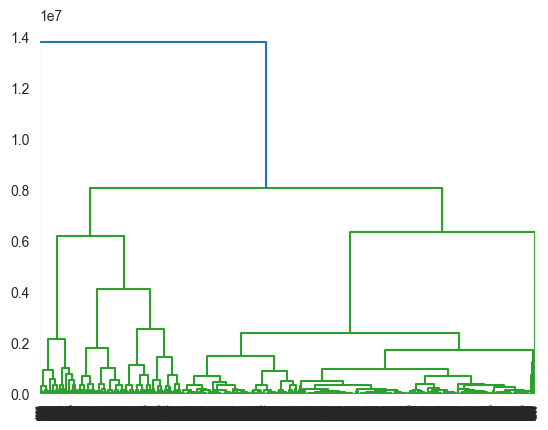

In [42]:
# This cell will take approximately 2.5 minutes
dendro = hierarchy.dendrogram(Z)

### How many clusters does the dendrogram suggest is best?

4

___
# Apply to data

In [43]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

### Instantiate the KMeans model with the number of clusters you found, fit and predict

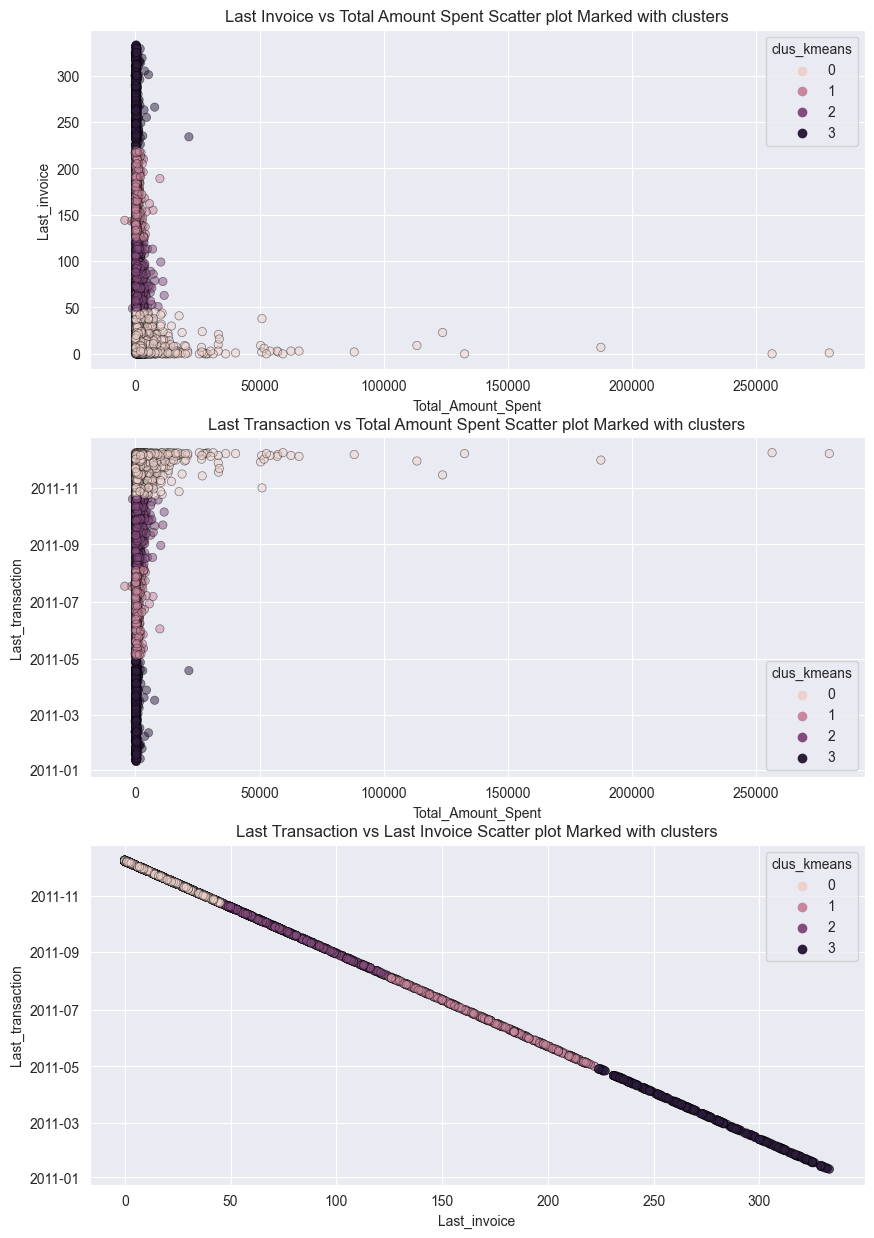

In [46]:
clus_kmeans = KMeans(n_clusters=4).fit(df_final[['Total_Amount_Spent', 'Last_invoice', 'Last_transaction_ts']])
labels = clus_kmeans.labels_
y_kmeans = clus_kmeans.predict(df_final[['Total_Amount_Spent', 'Last_invoice', 'Last_transaction_ts']])

df_kmeans = df_final.copy()
df_kmeans['clus_kmeans'] = labels

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.scatterplot(data=df_kmeans, x='Total_Amount_Spent', y='Last_invoice', hue=df_kmeans['clus_kmeans'], edgecolor='black', alpha=.5, ax=axes[0])
axes[0].set_ylabel = 'Last Invoice'
axes[0].set_xlabel = 'Total Amount Spent'
axes[0].set_title('Last Invoice vs Total Amount Spent Scatter plot Marked with clusters')

sns.scatterplot(data=df_kmeans, x='Total_Amount_Spent', y='Last_transaction', hue=df_kmeans['clus_kmeans'], edgecolor='black', alpha=.5, ax=axes[1])
axes[1].set_ylabel = 'Last Transaction'
axes[1].set_xlabel = 'Total Amount Spent'
axes[1].set_title('Last Transaction vs Total Amount Spent Scatter plot Marked with clusters')

sns.scatterplot(data=df_kmeans, x='Last_invoice', y='Last_transaction', hue=df_kmeans['clus_kmeans'], edgecolor='black', alpha=.5, ax=axes[2])
axes[2].set_ylabel = 'Last Transaction'
axes[2].set_xlabel = 'Last Invoice'
axes[2].set_title('Last Transaction vs Last Invoice Scatter plot Marked with clusters')

plt.show()

### What are the cluster's centers?

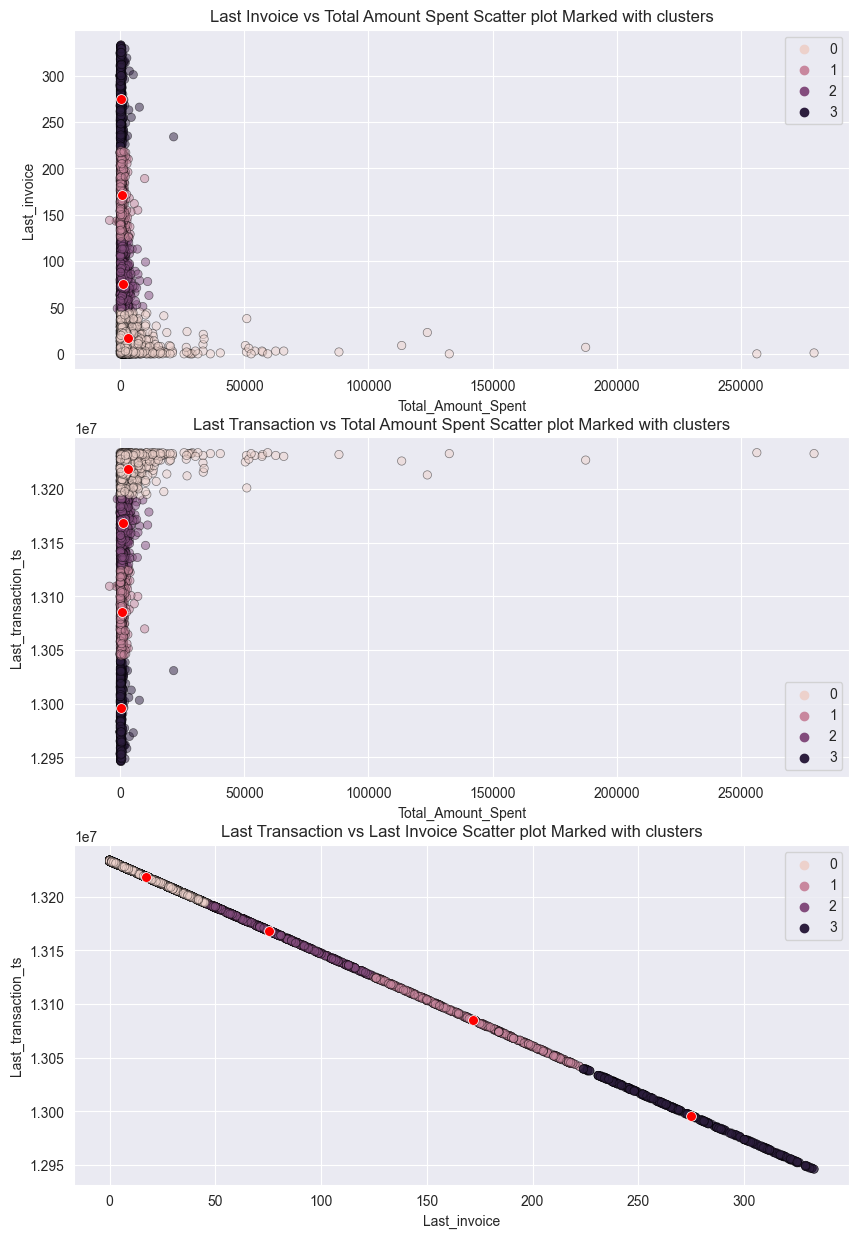

In [47]:
#   Centers are marked red
centers = clus_kmeans.cluster_centers_

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.scatterplot(data=df_kmeans, x='Total_Amount_Spent', y='Last_invoice', hue=df_kmeans['clus_kmeans'], edgecolor='black', alpha=.5, ax=axes[0])
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], c='red', s=50, alpha=1, ax=axes[0])
axes[0].set_ylabel = 'Last Invoice'
axes[0].set_xlabel = 'Total Amount Spent'
axes[0].set_title('Last Invoice vs Total Amount Spent Scatter plot Marked with clusters')

sns.scatterplot(data=df_kmeans, x='Total_Amount_Spent', y='Last_transaction_ts', hue=df_kmeans['clus_kmeans'], edgecolor='black', alpha=.5, ax=axes[1])
sns.scatterplot(x=centers[:, 0], y=centers[:, 2], c='red', s=50, alpha=1, ax=axes[1])
axes[1].set_ylabel = 'Last Transaction'
axes[1].set_xlabel = 'Total Amount Spent'
axes[1].set_title('Last Transaction vs Total Amount Spent Scatter plot Marked with clusters')

sns.scatterplot(data=df_kmeans, x='Last_invoice', y='Last_transaction_ts', hue=df_kmeans['clus_kmeans'], edgecolor='black', alpha=.5, ax=axes[2])
sns.scatterplot(x=centers[:, 1], y=centers[:, 2], c='red', s=50, alpha=1, ax=axes[2])
axes[2].set_ylabel = 'Last Transaction'
axes[2].set_xlabel = 'Last Invoice'
axes[2].set_title('Last Transaction vs Last Invoice Scatter plot Marked with clusters')

plt.show()

### Check the silhouette score of the kmeans algorithm

In [48]:
sil_score = silhouette_score(df_final[['Total_Amount_Spent', 'Last_invoice', 'Last_transaction_ts']], labels=labels, metric='euclidean')
print(f'Silhouette score of Kmeans Algorithm: {sil_score:.3f}')

Silhouette score of Kmeans Algorithm: 0.613


### Check the silhouette score of the Gaussian Mixture algorithm

In [49]:
gmm = GaussianMixture(n_components=4).fit(df_final[['Total_Amount_Spent', 'Last_invoice', 'Last_transaction_ts']])
labels = gmm.predict(df_final[['Total_Amount_Spent', 'Last_invoice', 'Last_transaction_ts']])
sil_score = silhouette_score(df_final[['Total_Amount_Spent', 'Last_invoice', 'Last_transaction_ts']], labels=labels, metric='euclidean')
print(f'Silhouette score of Kmeans Algorithm: {sil_score:.3f}')

Silhouette score of Kmeans Algorithm: 0.112


### Which algorithm is better?

Kmeans is better

### Create a new column for the final data frame that contains the predictions

In [57]:
preds = clus_kmeans.predict(df_final[['Total_Amount_Spent', 'Last_invoice', 'Last_transaction_ts']])
df_final['Cluster_No'] = preds

### Print the head of the final data frame

In [56]:
df_final.head()

,Total_Amount_Spent,Last_invoice,Last_transaction,Last_transaction_ordinal,Last_transaction_ts,Cluster_No
0,0.00,325,2011-01-18,734155,12953088,3
1,4310.00,1,2011-12-07,734478,13232160,0
2,1797.24,74,2011-09-25,734405,13169088,2
3,1757.55,18,2011-11-21,734462,13218336,0
4,334.40,309,2011-02-02,734170,12966048,3


### Print a scatterplot of the total amount spent against the last invoice based off of the clusters prediction
use palette = 'icefire'

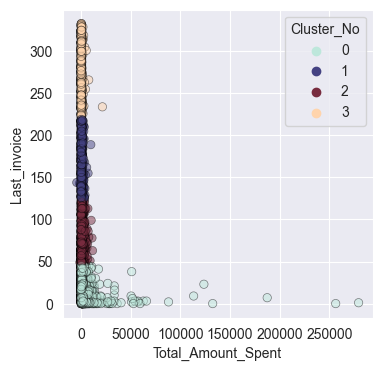

In [52]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df_final, x='Total_Amount_Spent', y='Last_invoice', hue=df_final['Cluster_No'], edgecolor='black', alpha=.5, palette='icefire')
plt.show()

### Print a scatterplot of the total amount spent against the last transaction based off of the clusters prediction
use palette = 'icefire'

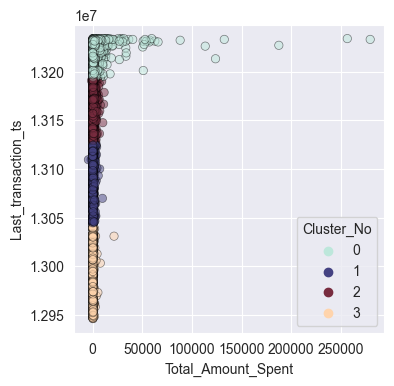

In [53]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df_final, x='Total_Amount_Spent', y='Last_transaction_ts', hue=df_final['Cluster_No'], edgecolor='black', alpha=.5, palette='icefire')
plt.show()

### Print a scatterplot of the last transaction against the last invoice based off of the clusters prediction
use palette = 'icefire'

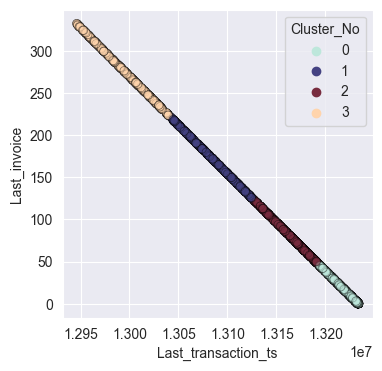

In [54]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df_final, x='Last_transaction_ts', y='Last_invoice', hue=df_final['Cluster_No'], edgecolor='black', alpha=.5, palette='icefire')
plt.show()

### Print a 3D plot of the three features based off of the clusters prediction
use palette = 'icefire'

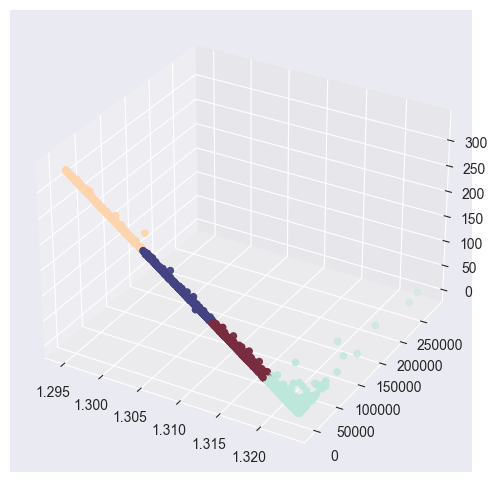

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(df_final['Last_transaction_ts'], df_final['Total_Amount_Spent'], df_final['Last_invoice'], c=df_final['Cluster_No'], cmap='icefire')

plt.show()

___
# GOOD LUCK !!